# Assignment 1
## Part A

### Question 1) 
### Reading Data:
---

In [2]:
import time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import IPython.display as ipd

from scipy.io import wavfile as wav

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler

2022-10-09 15:55:52.738039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-09 15:55:52.738060: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, Flatten, InputLayer

In [3]:
SEED = 42

import os
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

In [4]:
df = pd.read_csv('./data/full.csv')
pd.set_option('display.max_columns', None)
df.head()

,filename,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_var,chroma_cq_mean,chroma_cq_var,chroma_cens_mean,chroma_cens_var,melspectrogram_mean,melspectrogram_var,mfcc_mean,mfcc_var,mfcc_delta_mean,mfcc_delta_var,rmse_mean,rmse_var,cent_mean,cent_var,spec_bw_mean,spec_bw_var,contrast_mean,contrast_var,rolloff_mean,rolloff_var,poly_mean,poly_var,tonnetz_mean,tonnetz_var,zcr_mean,zcr_var,harm_mean,harm_var,perc_mean,perc_var,frame_mean,frame_var,mfcc0_mean,mfcc0_var,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var
0,app_3001_4001_phnd_neg_0000.wav,184.570312,623,69.222222,0.515281,0.093347,0.443441,0.082742,0.249143,0.021261,0.038422,0.087981,-16.290880,8822.263672,0.014360,7.908705,0.043470,0.000818,1833.579533,511344.031721,1746.559035,144881.971359,19.095815,319.628529,3827.147750,3827.147750,0.294635,0.294635,0.015770,0.012313,0.114622,0.004777,2.852700e-06,0.001529,7.470300e-06,0.000618,1.729204,0.945134,-389.578400,1394.284424,134.581345,694.736450,-39.877445,331.621368,55.018433,417.293945,-36.944489,246.965225,18.573177,270.046539,-19.398455,136.647842,4.641793,166.485138,-5.455597,105.498589,-6.548687,143.077621,1.620288,80.328003,-14.974999,55.536694,1.443957,105.002190,-10.213489,52.869869,0.718760,75.744896,-10.669799,63.340282,1.811605,58.117188,-3.286546,54.268448,-2.719069,59.548176,-4.559987,70.774803
1,app_3001_4001_phnd_neg_0001.wav,151.999081,521,74.428571,0.487201,0.094461,0.542182,0.073359,0.274423,0.008025,0.204988,5.152482,-16.183870,7335.709961,-0.025494,18.772476,0.090213,0.008415,1927.253538,354369.575716,1627.620214,68783.641466,19.186873,305.084512,3762.586531,3762.586531,0.583882,0.583882,0.015399,0.006057,0.122172,0.003331,-1.651200e-06,0.002638,-2.788160e-05,0.009359,1.793741,0.910349,-350.381317,5990.534668,112.355591,596.321411,-50.575706,1418.432983,39.114021,507.006927,-33.239597,416.781708,3.573578,236.576492,-11.785189,178.042618,-1.014654,178.834152,4.223846,226.874054,-8.432135,133.631943,-0.922831,75.745110,-14.040901,129.677872,-1.542051,89.679306,-2.871657,86.871460,-2.855503,106.239403,-5.666375,90.256195,1.573594,105.070496,-0.742024,82.417496,-1.961745,119.312355,1.513660,101.014572
2,app_3001_4001_phnd_neg_0002.wav,112.347147,1614,146.727273,0.444244,0.099268,0.442014,0.083224,0.264430,0.013410,0.218063,3.372185,-15.555374,7140.790039,-0.001268,10.850190,0.099754,0.005438,1558.350787,286662.686733,1480.320551,108552.760715,19.694916,271.168203,3027.938960,3027.938960,0.626042,0.626042,0.000772,0.012586,0.094763,0.002338,-2.344000e-07,0.005676,1.925600e-06,0.005432,2.204735,1.657315,-340.841705,2853.958740,139.396652,639.750854,-44.360332,786.586487,34.030853,405.441681,-37.146648,447.909576,1.166850,360.854797,-11.257973,170.027328,-3.371944,226.699600,1.764457,140.997101,-9.144030,123.745407,0.545947,68.511703,-12.346964,91.306229,-3.448010,96.648567,-4.782896,96.846092,-3.135671,85.535561,-5.502390,73.079750,0.202623,72.040550,-4.021009,73.844353,-5.916223,103.834824,-2.939086,113.598824
3,app_3001_4001_phnd_neg_0003.wav,107.666016,2060,158.461538,0.454156,0.100834,0.424370,0.084435,0.257672,0.016938,0.214154,3.943239,-16.382410,7671.897461,-0.017487,10.714126,0.092214,0.006496,1501.958914,236170.752891,1468.111222,100434.245015,19.731574,280.614702,2981.342123,2981.342123,0.544611,0.544611,0.024137,0.015121,0.085925,0.001861,-4.205000e-07,0.006873,-2.248000e-07,0.004422,1.789098,1.241672,-359.523376,3351.339844,135.395157,589.953613,-40.197311,840.564270,32.704830,312.519379,-28.228338,411.952454,0.862422,276.248840,-9.016964,178.003738,-6.123117,168.513107,1.593995,121.375755,-7.000763,103.869049,-3.3311

In [5]:
df['label'] = df['filename'].str.split('_').str[-2]

In [6]:
df['label'].value_counts()

pos    92826
neg    89428
Name: label, dtype: int64

Split and Scale data

In [7]:

columns_to_drop = ['label','filename']

def split_dataset(df, columns_to_drop, test_size, random_state):
  label_encoder = preprocessing.LabelEncoder()

  df['label'] = label_encoder.fit_transform(df['label'])

  df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)

  df_train2 = df_train.drop(columns_to_drop,axis=1)
  y_train2 = df_train['label'].to_numpy()

  df_test2 = df_test.drop(columns_to_drop,axis=1)
  y_test2 = df_test['label'].to_numpy() 

  return df_train2, y_train2, df_test2, y_test2

def preprocess_dataset(df_train, df_test):

  standard_scaler = preprocessing.StandardScaler()
  df_train_scaled = standard_scaler.fit_transform(df_train)

  df_test_scaled = standard_scaler.transform(df_test)

  return df_train_scaled, df_test_scaled

X_train, y_train, X_test, y_test = split_dataset(df, columns_to_drop, test_size=0.3, random_state=0) # positive labels being encoded as 1

X_train_scaled, X_test_scaled = preprocess_dataset(X_train, X_test)

## 1a) Use the training dataset to train the model for 100 epochs. Implement early stopping with patience of 3

In [22]:
# callback to save the best weights for the model
def saveWeightsCallback(path,monitor,mode,save_freq):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=path,
        monitor = monitor,
        verbose = 1,
        save_best_only = True,
        save_weights_only = True,
        mode = mode,
        save_freq=save_freq,
)

In [34]:

def build_model(no_neurons_hidden,dropout_prob):
    model = Sequential([
        # 77 is the number of inputs in one row. one row is one data
        InputLayer(input_shape = (X_train.shape[1],)),
        Dense(no_neurons_hidden,activation='relu'),
        Dropout(dropout_prob),
        Dense(no_neurons_hidden,activation='relu'),
        Dropout(dropout_prob),
        Dense(no_neurons_hidden,activation='relu'),
        Dropout(dropout_prob),
        Dense(2,activation='softmax')
    ])
    return model

def compile_and_train_model(model,max_epochs,lr,batch_size,X_train,y_train,X_test_scaled,y_test):
    model.compile(optimizer = Adam(learning_rate = lr), 
              loss='sparse_categorical_crossentropy',
             metrics=[
                 'accuracy',
                 'mean_squared_error'
             ])

    history = model.fit(X_train_scaled,y_train,
                       epochs = max_epochs,
                       verbose = 0,
                       callbacks= [EarlyStopping(monitor='val_loss', patience=3),
                                   saveWeightsCallback(
                                       path='./weights/PartA_q1a/PartA_q1a',
                                       monitor = 'val_loss',
                                       mode = 'min',
                                       save_freq='epoch',
                                   )],
                       use_multiprocessing = True,
                       batch_size = batch_size,
                       validation_data=(X_test_scaled,y_test))
    return history

In [35]:
max_epochs = 100   
no_neurons_hidden = 128
lr = 0.001
batch_size = 256
dropout_prob = 0.2

model = build_model(no_neurons_hidden,dropout_prob)
history = compile_and_train_model(model,max_epochs,lr,batch_size,X_train,y_train,X_test_scaled,y_test)


Epoch 1: val_loss improved from inf to 0.68423, saving model to ./weights/PartA_q1a/PartA_q1a

Epoch 2: val_loss improved from 0.68423 to 0.68236, saving model to ./weights/PartA_q1a/PartA_q1a

Epoch 3: val_loss improved from 0.68236 to 0.68029, saving model to ./weights/PartA_q1a/PartA_q1a

Epoch 4: val_loss improved from 0.68029 to 0.67678, saving model to ./weights/PartA_q1a/PartA_q1a

Epoch 5: val_loss improved from 0.67678 to 0.67382, saving model to ./weights/PartA_q1a/PartA_q1a

Epoch 6: val_loss improved from 0.67382 to 0.67086, saving model to ./weights/PartA_q1a/PartA_q1a

Epoch 7: val_loss improved from 0.67086 to 0.66796, saving model to ./weights/PartA_q1a/PartA_q1a

Epoch 8: val_loss improved from 0.66796 to 0.66396, saving model to ./weights/PartA_q1a/PartA_q1a

Epoch 9: val_loss improved from 0.66396 to 0.66054, saving model to ./weights/PartA_q1a/PartA_q1a

Epoch 10: val_loss improved from 0.66054 to 0.65905, saving model to ./weights/PartA_q1a/PartA_q1a

Epoch 11: va

In [36]:
# uncomment below to load best weights of model if you dont want to train
# new_model = build_model(no_neurons_hidden,dropout_prob)
# new_model.load_weights('./weights/PartA_q1a/PartA_q1a')

## Plotting Learning Curves
1b) Plot train and test accuracies and losses on training and test data against training
epochs and comment on the line plots. Explain the use of early stopping in this
question

Text(0, 0.5, 'loss')

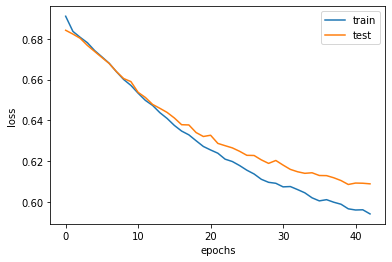

In [37]:
plt.figure(1)
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'])
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.ylabel('loss')


Text(0, 0.5, 'classification accuracy')

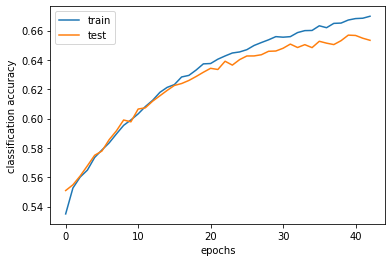

In [38]:
plt.figure(2)
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'])
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.ylabel('classification accuracy')

Early stopping prevents overfitting by monitoring the loss field. in this case, when 3 consecutive epochs passes wihtout any improvement to the loss metric the training will stop, thus preventing the model from continuing training and thus overfitting from increasing the weights too much